<a href="https://colab.research.google.com/github/philipoladimeji/ITNPBD4-Portfolio/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration

In [ ]:
#!pip install pmdarima

In [1]:
# For proper analysing it will be required to import some essential machine learning libraries to enable efficient data handling, data
#visualization and analysis without writing the required code from the beginning. Libraries like pandas which is use to analyse, manipulte and
#clean data using dataframe. numpy is use to support numerical and mathematical operations.
# OS is use to utilise and communicate with the operating system, aids in managing environment variables, directories, and file paths. CSV enables
# reading and writing of files. matplotlib.pyplot is for creating charts and graphs for visualisations. seaborn is built on matplotlib for improved
# colour schemes and styles.

#Importing pandas library
import pandas as pd
#Importing numpy library for numerical operations
import numpy as np
#Importing os to utilise and communicate with operating system and aids in managing directories and file paths
import os
#Importing csv library to enable reading and writing of files
import csv
#Importing matplotlib.pyplot to customise and create visualisations from data
import matplotlib.pyplot as plt
#Importing season to make visualisation informative and improve colour schmes and styles
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Getting the file path and saving it in the working directory
from google.colab import files
uploaded = files.upload

In [ ]:
df = pd.read_csv("/content/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(119390, 32)

Data Validation

In [ ]:
#The double quotation checks for empty strings in the given data frame. It replaces with nan (not a number) which is pandas method of representing
#missing values. The inplace=True as seen implies the adjustment is done directly in the dataframe. The isnull finds the missing values for an
#array lookalike object in the cell and the dot sum count the number of missing value for each columns if there is

# Checking for missing value in data and print the total number of missing values on each
df.replace('', np.nan, inplace=True)

#Output the number of missing values on each column if it's available
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


/tmp/ipython-input-2935668792.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="YlOrRd")


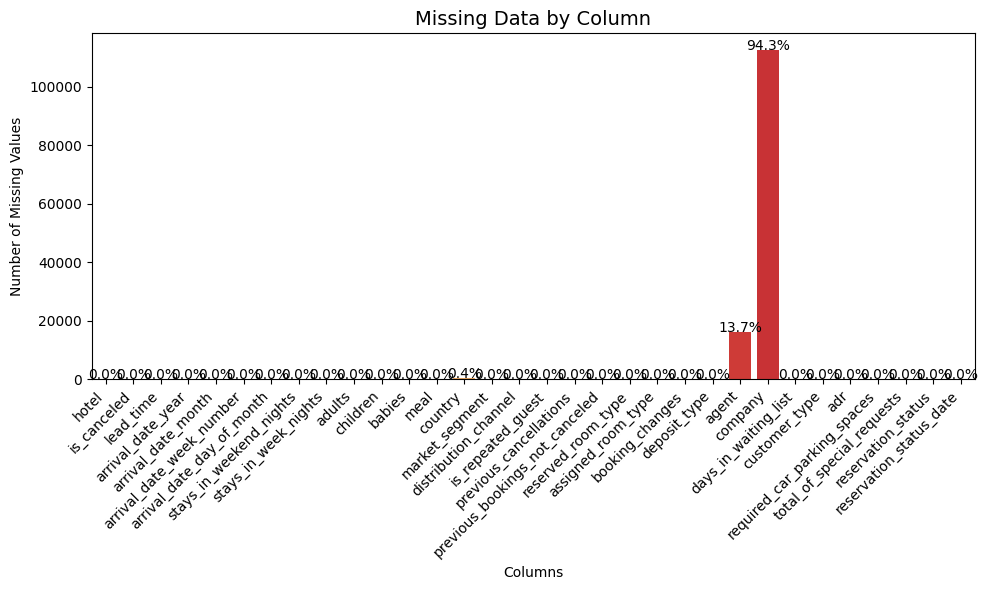

In [ ]:
#Looping through the column and count the missing values
missing_values = df.isnull().sum()
total_rows = len(df)

#print the plot in a bar chart form to display the missing values in each columns
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="YlOrRd")

#Add percentages on each bar
for i, value in enumerate(missing_values.values):
    percent = (value / total_rows) * 100
    ax.text(i, value + 0.5, f"{percent:.1f}%", ha='center', fontsize=10)

#The rotation and the label words makes the plot to be easy to understand
plt.title("Missing Data by Column", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
df = df.drop(['company', 'agent'], axis=1)
df = df.dropna(subset=['country', 'children', 'arrival_date_week_number'], axis=0)
df = df.reset_index(drop=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df['children'] = df['children'].astype(int)
df['children'].dtype

dtype('int64')

In [ ]:
#Output the number of missing values on each column if it's available
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Data Visualizations

In [ ]:
country_freq = df['country'].value_counts().to_frame()
country_freq.columns = ['count']
fig = px.choropleth(country_freq, color='count',
                    locations=country_freq.index,
                    hover_name=country_freq.index,
                    color_continuous_scale=px.colors.sequential.Teal)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22))  #Location and the font size of the main title
fig.show()

According to map visualization, It is seen that most of the customers are coming from the Portuguese. The customers are coming from the Europe region.

In [ ]:
# fig = px.histogram(df, x="market_segment", color='hotel')
# fig.update_layout(barmode='group', xaxis={'categoryorder': 'total descending'})
# fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
# fig.update_layout(title_text='Distribution of Market Segment by different Hotel Types',
#                   title_x=0.5, title_font=dict(size=20))  # Location and the font size of the main title
# fig.show()

To streamline the process of the analysis, I specifically focus on the booking demand for the resort hotel and create a time series dataset where booking numbers are grouped according to the arrival date.

In [2]:
import pandas as pd
df = pd.read_csv("/content/hotel_bookings.csv")\
    .rename(columns={'arrival_date_year':'year','arrival_date_month':'month',
                     'arrival_date_day_of_month':'day'})


def monthToNum(shortMonth):
    return {
            'January': 1,
            'February': 2,
            'March': 3,
            'April': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'August': 8,
            'September': 9,
            'October': 10,
            'November': 11,
            'December': 12
    }[shortMonth]

df['month'] = df['month'].apply(monthToNum)
df['date']= pd.to_datetime(df[["year", "month", "day"]])

#fileter data for resort hotel and remove cancelations
df = df[(df['is_canceled']==0) & (df['hotel']=='Resort Hotel')]
t_df = df.groupby(['date'])['hotel'].count().reset_index()\
         .rename(columns={'hotel':'y','date':'ds'})

In [3]:
#import plotly.express as px

fig = px.line(t_df, x="ds", y="y", title='Hotel demands')
fig.update_layout(
    title_x=0.5
)
fig.show()

Inorder to assess the effectiveness of each forecasting method, A training period of 25 months is allocated, followed by a test period of 1 month specifically in August 2017.

In [4]:
train_df = t_df.loc[(t_df['ds']>='2015-07-01') & (t_df['ds']<'2017-08-01')]
test_df = t_df.loc[(t_df['ds']>='2017-08-01') & (t_df['ds']<'2017-09-01')]

Mean Absolute Error (MAE) is used as a measure of the average error across the entire sequence, but it is good to know it does not capture the temporal or structural dependencies within the sequence. Mean Squared Error (MSE) can also be used with its focus on penalizing large errors.

Step 1: ARIMA

ARIMA (Auto Regressive Integrated Moving Average) is one of the most common models for stationary time series and is widely used for short-term forecasting. ARIMA(p,d,q) is a model that joins a simple combination of Auto Regression and Moving Average model. Auto Regression uses past values to make a prediction while Moving Average uses past errors to make a prediction.

Where: p indicates the number of Autoregressive time lag terms in the model.

d indicates  the number of differentiations applied to the time series values.

q indicates the number of Moving Average time lag terms in the model.

Initially, I employ a technique known as time series decomposition to break down my time series into three distinct elements which are: trend, seasonality, and noise. However, during my analysis, I did not observe a noticeable trend but I can see weekly seasonality within the data.

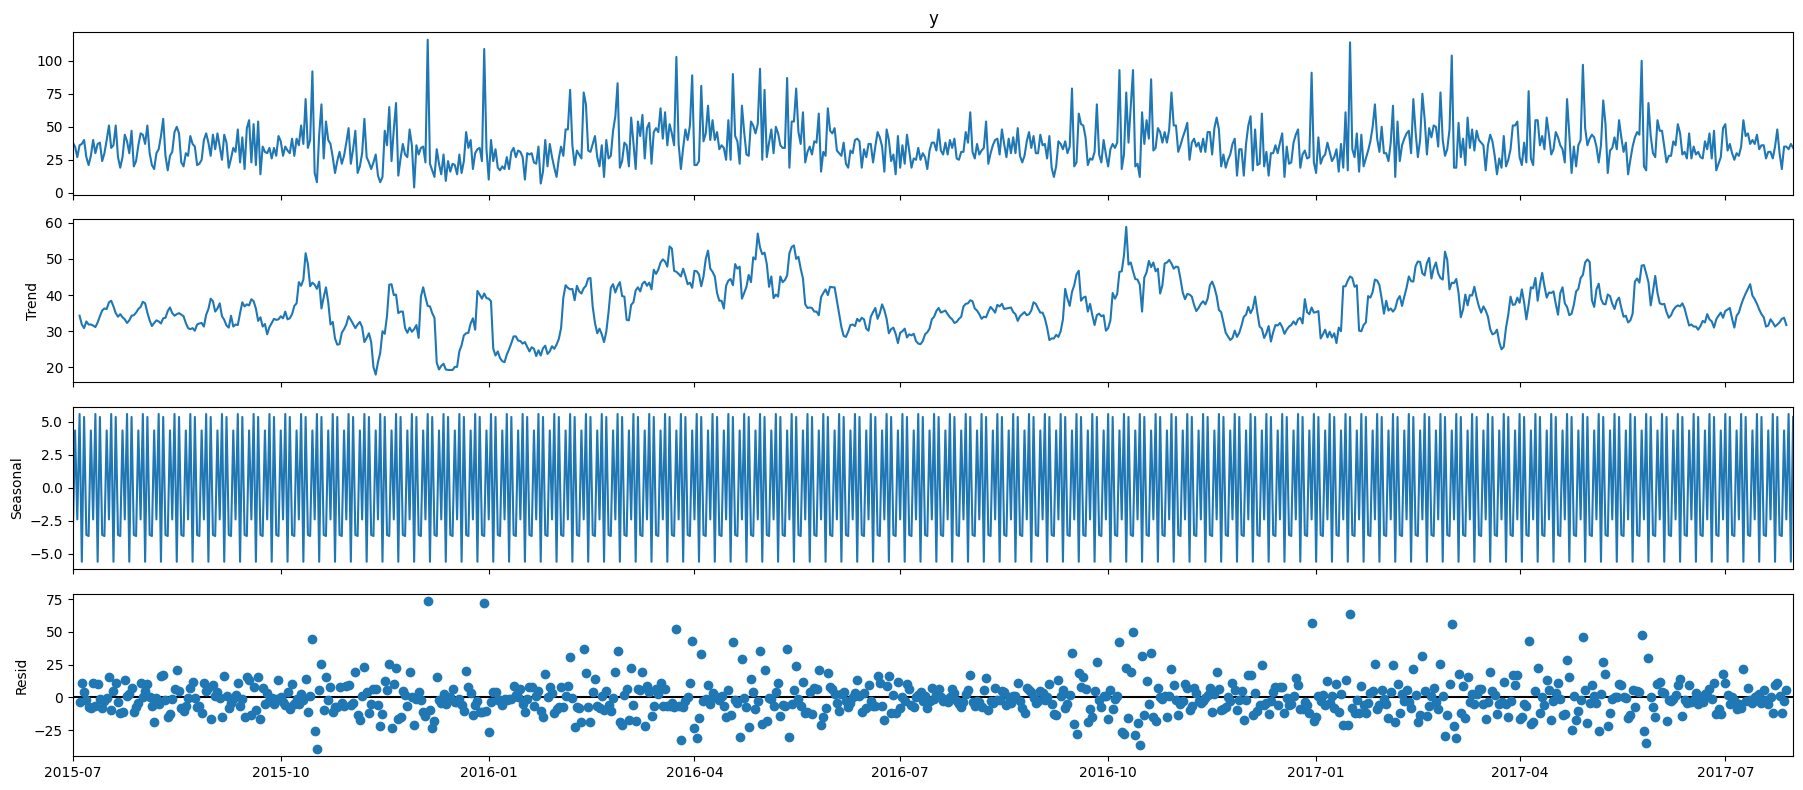

In [5]:
from pylab import rcParams
import statsmodels.api as sm

train_df_arima = train_df.copy()
train_df_arima = train_df_arima.set_index('ds')

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train_df_arima['y'],
                                          model='additive')
fig = decomposition.plot()
plt.show()

To initiate the construction of an ARIMA model, the initial step involves determining the appropriate value for the differencing parameter (d) by assessing the stationarity of the dataset. In this case, the Augmented Dickey-Fuller (ADF) test yields a small p-value (<0.05), indicating that the time series data does not necessitate differencing.

In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

train_df_arima = train_df.copy()
train_df_arima.set_index('ds', inplace=True)
result = adfuller(train_df_arima['y'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.555954951696751
p-value: 0.00015559448784235356


Even though partial autocorrelation function (PACF) and Autocorrelation function (ACF) plots can be used to identify p and q, it is often difficult to read the plots. Thus, I utilize the auto_arima function to automatically determine the optimal (p, d, q) values with m parameter to be 52 (weekly ) as the number of observations per seasonal cycle. After applying this approach, the minimum AIC is achieved with ARIMA(2,0,2)(2,1,0)[52].

In [7]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(train_df_arima['y'],seasonal=True,m=12, D=1,
                          trace=True, error_action='ignore',
                          suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=12.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6766.805, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=6546.565, Time=2.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6764.805, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6768.679, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=6503.587, Time=3.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.25 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6501.666, Time=5.81 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=6544.568, Time=1.53 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.10 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.17 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=6503.584, Time=2.94 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  762
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood               -3246.834
Date:                  Tue, 09 Dec 2025   AIC                           6499.668
Time:                          16:26:31   BIC                           6513.528
Sample:                      07-01-2015   HQIC                          6505.008
                           - 07-31-2017                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6297      0.032    -19.930      0.000      -0.692      -0.568
ar.S.L24      -0.2401      0.034     -7.097      0.000      -0.306      -0.174
sigma2       334.8400     11.476     29.178      0.000     312.348     357.332
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               305.40
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.90
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Consequently, I utilize ARIMA(2,0,2)(2,1,0)[52] order to construct the ARIMA model, leveraging its superior performance based on the AIC criterion.

In [9]:
import statsmodels.api as sm
mod = sm.tsa.arima.ARIMA(train_df_arima['y'],order=(2,0,2),\
                         seasonal_order=(2,1,0,12))

results = mod.fit()

Next, I'll proceed to validate the ARIMA model by predicting the outcomes for a period of 31 days in August 2017. The Mean Absolute Error (MAE) for this validation is computed to be 8.

Text(0, 0.5, 'Bookings')

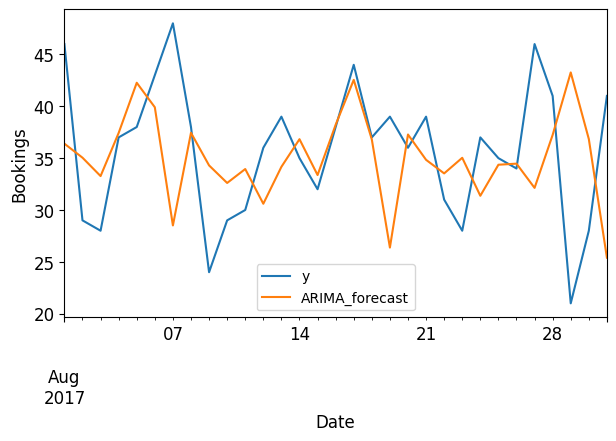

In [10]:
pred= pd.DataFrame(results.forecast(steps=31)).reset_index()
test_output = test_df.merge(pred,left_on='ds', right_on='index', how='inner').reset_index()
test_output = test_output.rename(columns={'predicted_mean':'ARIMA_forecast'})
test_output_viz = test_output[['ds','y','ARIMA_forecast']]
test_output_viz= test_output_viz.set_index('ds')

test_output_viz.plot.line(figsize=(7,4),fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

In [11]:
from sklearn.metrics import mean_absolute_error
print('Time Series: {:.0f}'.format(mean_absolute_error\
(test_output[['ARIMA_forecast']],test_output[['y']])))

Time Series: 6


Step 2: Prophet
It's a time series forecasting model developed by Facebook that uses a decomposable time series model to capture trends, seasonality, and holidays in the data. It is not necessary to do differencing when using Prophet for time series forecasting. Prophet is designed to handle non-stationary time series data with trends and seasonality.

The next step for me is to construct a Prophet model and utilize it to make predictions for a 31-day period in August 2017. After utilizing the original training time series, the resulting predictions are added to the line chart for visualization.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


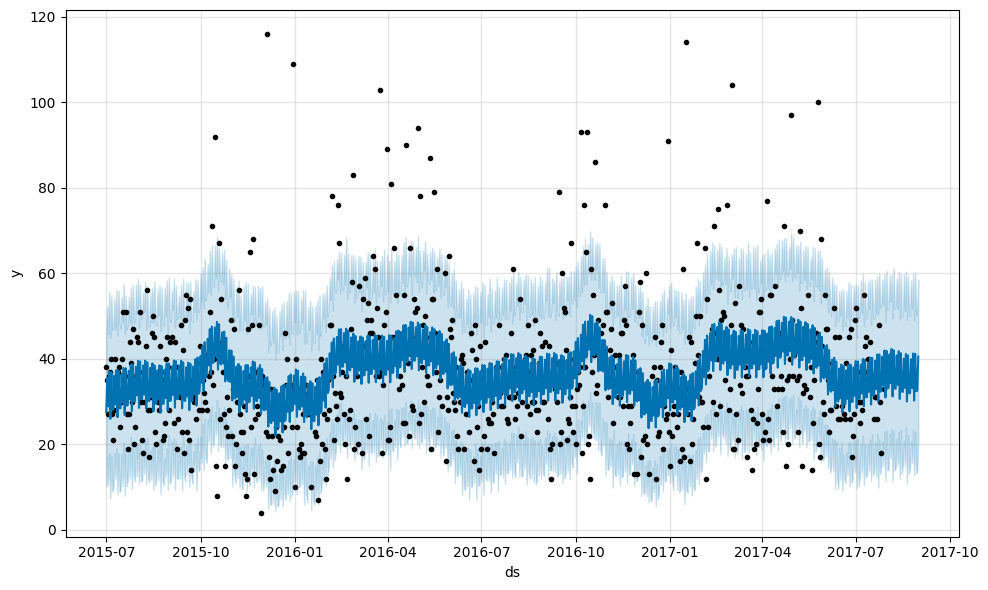

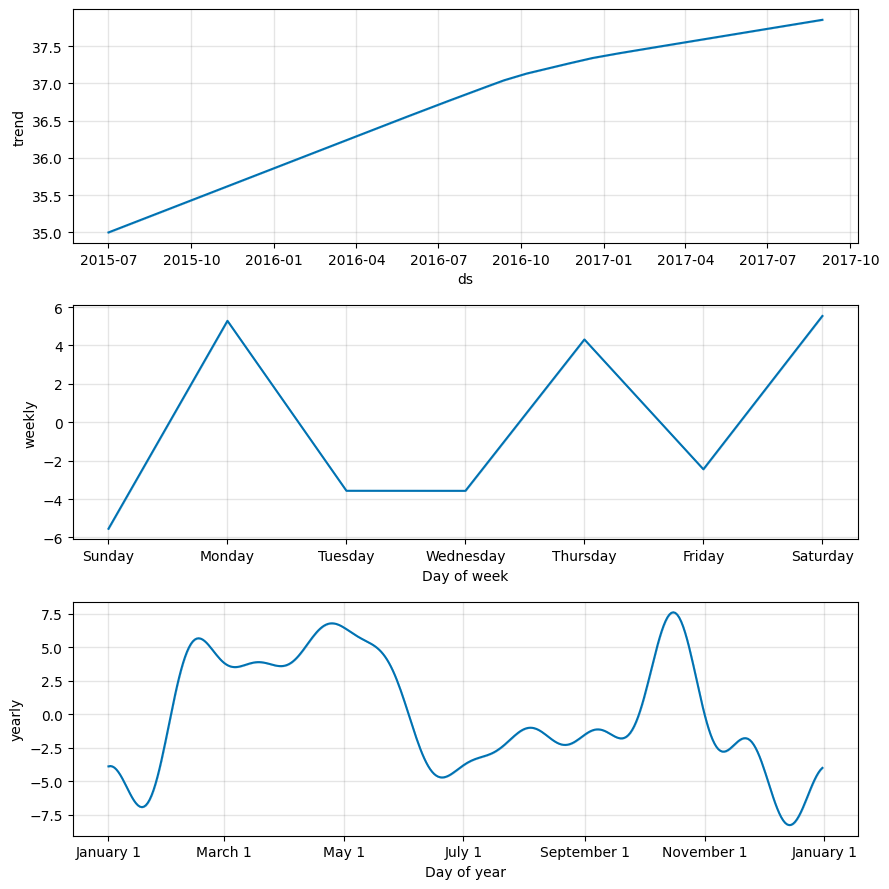

In [12]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

train_df_prophet = train_df.copy()
model = Prophet(weekly_seasonality=True)
model.fit(train_df_prophet)
forecast = model.make_future_dataframe(periods=31)
pred = model.predict(forecast)

#plots
prophet_plot = model.plot(pred)

prophet_plot2 = model.plot_components(pred)

Upon analyzing the component breakdowns of the Prophet model, several noteworthy patterns emerge. Firstly, the model reveals an upward trend, indicating a general increase over time. Additionally, it identifies peaks occurring specifically on Mondays and Thursdays, suggesting higher demand on these particular days.

Moreover, when examining the yearly graph, two distinct peaks are detected. The first peak is observed between February and May, while the second peak occurs in October.

So, I'll proceed to validate the forecast generated by the Prophet model by comparing it to the actual numbers recorded in August 2017. The Mean Absolute Error (MAE) for this validation is calculated to be 6.

Text(0, 0.5, 'Bookings')

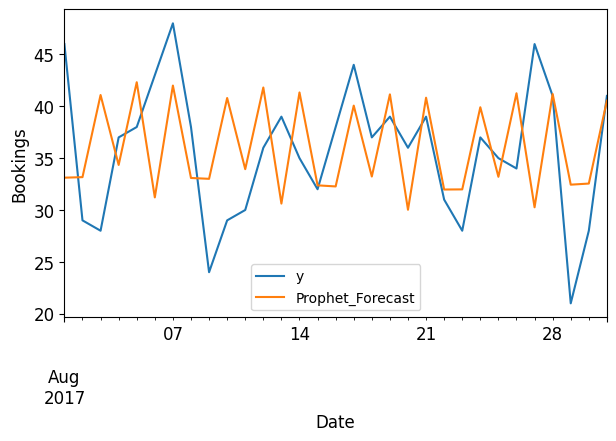

In [13]:
forecast_df = test_df.merge(pred,left_on='ds', right_on='ds', how='inner')\
.rename(columns={'yhat':'Prophet_Forecast'})

test_output_viz = forecast_df[['ds','y','Prophet_Forecast']]
test_output_viz= test_output_viz.set_index('ds')

test_output_viz.plot.line(figsize=(7,4),fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Bookings', fontsize=12)

In [14]:
from sklearn.metrics import mean_absolute_error
print('Time Series: {:.0f}'.format(mean_absolute_error\
(forecast_df[['Prophet_Forecast']], forecast_df[['y']])))

Time Series: 6


Step 3: Long Short-Term Memory (LSTM)

LSTM is an advanced type of Recurrent Neural Network which is also known as RNN specifically designed to address the vanishing gradient problem. By incorporating a memory cell that retains information over time, LSTM effectively captures temporal dependencies. It employs three gates (input, output, and forget) to control the flow of information in and out of the memory cell. This selective process of remembering or forgetting past information, coupled with updates based on new input, allows LSTM to capture and leverage long-term dependencies in the data.

To start LSTM analysis, I'll start with constructing time series data.

In [15]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    #Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    #Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    #Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    #Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    #Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

#Parameters
window_size = 31
batch_size = 32
shuffle_buffer_size = 1000

#Generate the dataset windows
x_train= train_df[['y']]
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)